# Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential

C:\Users\abhij\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv('./ecg_autoencoder_dataset.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [5]:
X = data.drop(columns=[140])
y = data[140]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.3, random_state=42)

# Defining Model

In [13]:
class Autoencoder(Model):
    def __init__(self):
        super().__init__()
        
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(32, activation='relu'),
        ])
        
        self.code = Sequential([
            Dense(16,activation='relu')
        ])
        
        self.decoder = Sequential([
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(140,activation='relu')
        ])
        
    def call(self, inputs, *args):
        encoded_inputs = self.encoder(inputs)
        code = self.code(encoded_inputs)
        decoded_inputs = self.decoder(code)
        return decoded_inputs

# Training the model

In [14]:
model = Autoencoder()
model.compile(loss='mse', optimizer='adam')

In [15]:
history = model.fit(X_train, X_train, epochs=10, validation_data=(X_test, X_test))

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.9037 - val_loss: 0.7880
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7792 - val_loss: 0.7654
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7592 - val_loss: 0.7473
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7435 - val_loss: 0.7433
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7420 - val_loss: 0.7416
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7394 - val_loss: 0.7399
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7407 - val_loss: 0.7389
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7361 - val_loss: 0.7384
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7376 - val_loss: 0.7377
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7358 - val_loss: 0.7369


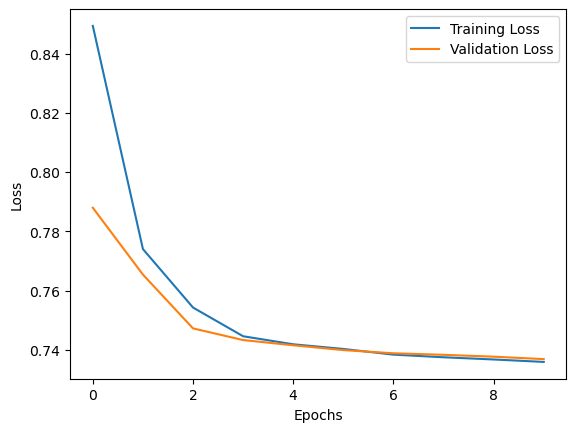

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Finding threshold for fraud transaction

In [17]:
def find_threshold(autoencoder_model : Model , train_data):
    # Reconstruct the input using autoencoder model
    reconstruction = autoencoder_model.predict(train_data)
    
    # Calculate the loss
    loss = tf.keras.losses.msle(train_data, reconstruction)
    
    # Calculate the threshold
    threshold = np.mean(loss.numpy()) + np.std(loss.numpy())
    
    return threshold



def get_predictions(autoencoder_model : Model , test_data, threshold):
    # Reconstruct the input using autoencoder model
    reconstruction = autoencoder_model.predict(test_data)
    
    # Calculate the loss
    loss = tf.keras.losses.msle(test_data, reconstruction)
    
    anomaly_mask = pd.Series(loss) > threshold
    
    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
    
    return preds


In [18]:
threshold = find_threshold(model, X_train)
print(f'Threshold: {threshold}')

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Threshold: 0.029832713305950165


# Making Predictions

In [19]:
y_preds = get_predictions(model,X_test,threshold)

print(accuracy_score(y_test, y_preds))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
0.5733333333333334
